#📌 Extracão

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('/TelecomX_Data.json')
df = pd.json_normalize(df.to_dict(orient='records'))

#🛠️ Preparação dos Dados

In [15]:
# 1. Tratamento da coluna de Cobranças Totais
coluna_total = 'account.Charges.Total'
if coluna_total in df.columns:
    df[coluna_total] = pd.to_numeric(df[coluna_total], errors='coerce').fillna(0)
    df = df.rename(columns={coluna_total: 'TotalCharges', 'account.Charges.Monthly': 'MonthlyCharges'})
    print("Colunas de custos convertidas e renomeadas!")

# 2. Remoção de IDs
df = df.drop(columns=[c for c in ['customerID', 'id'] if c in df.columns])

# 3. One-Hot Encoding
# Transformando categorias em 0 e 1
df_final = pd.get_dummies(df, drop_first=True)



#🎯 Correlação e Seleção de Variáveis


--- Análise de Desequilíbrio de Classes ---
Clientes Ativos (False): 5398 (74.28%)
Clientes Evasão (True):  1869 (25.72%)
----------------------------------------


/tmp/ipython-input-187/1515576691.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes Ativos (False): {contagem_churn[0]} ({proporcao_churn[0]:.2f}%)")
/tmp/ipython-input-187/1515576691.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes Evasão (True):  {contagem_churn[1]} ({proporcao_churn[1]:.2f}%)")


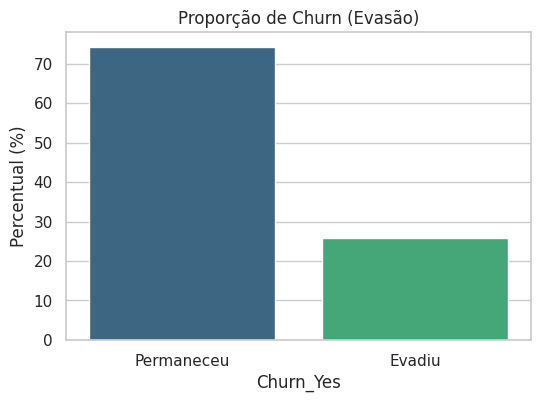

/tmp/ipython-input-187/1515576691.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if proporcao_churn[1] < 20:


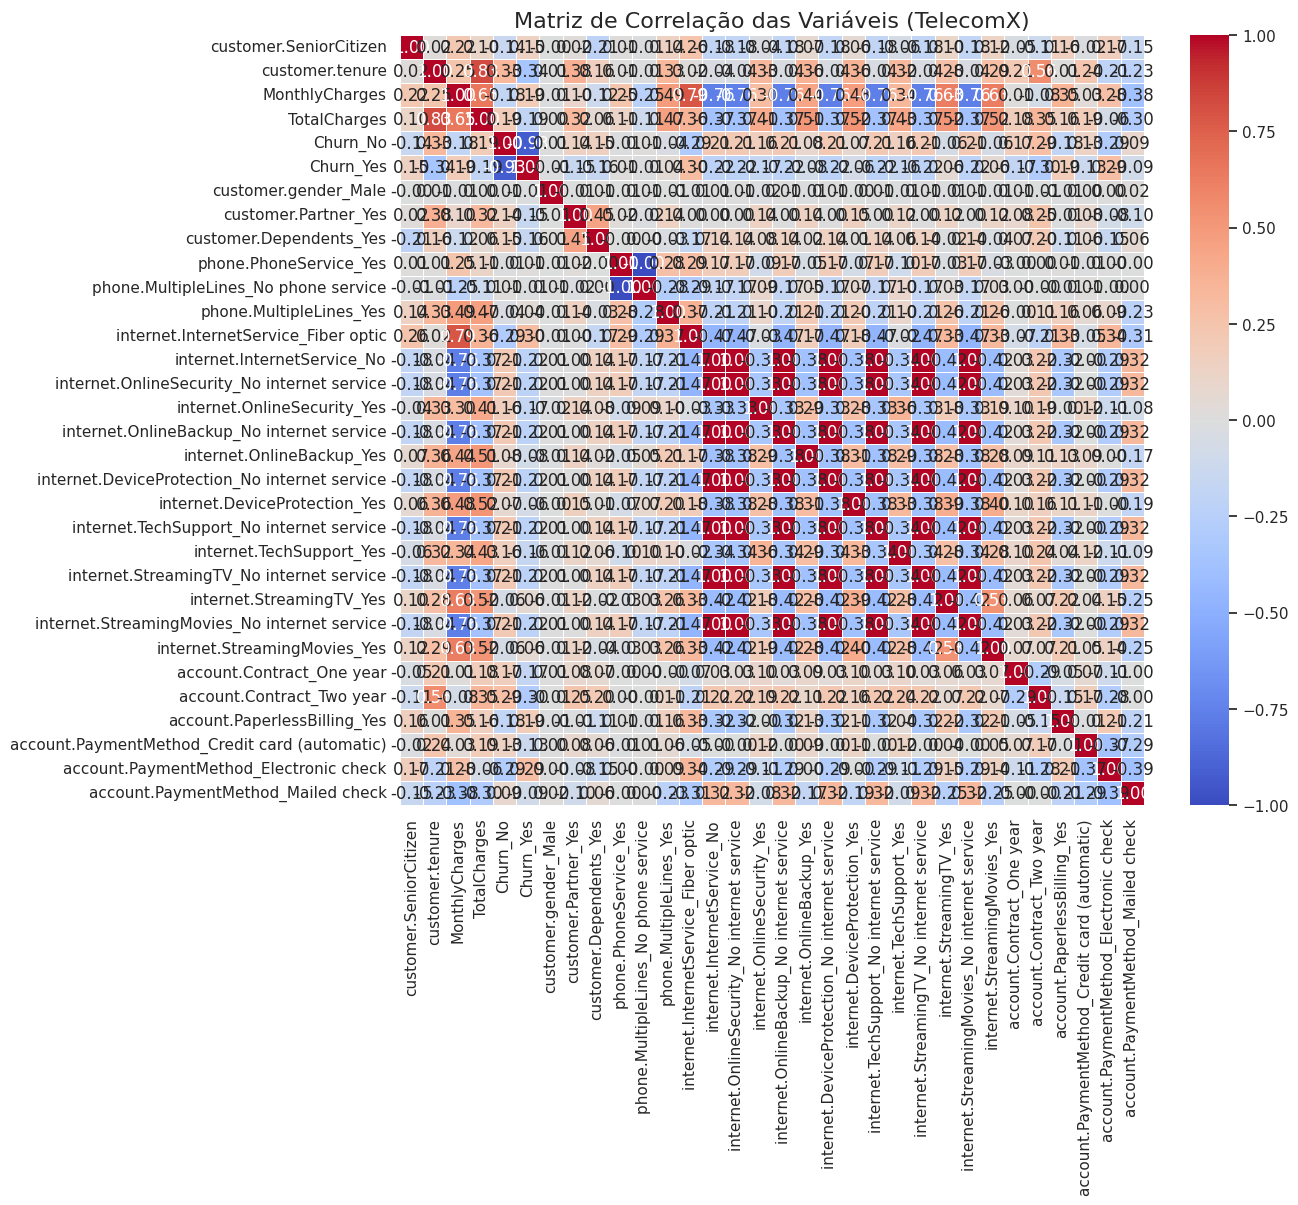

Variáveis com maior impacto no Churn:
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.300949
account.PaymentMethod_Electronic check           0.294626
MonthlyCharges                                   0.189866
account.PaperlessBilling_Yes                     0.186666
customer.SeniorCitizen                           0.146733
internet.StreamingTV_Yes                         0.062430
internet.StreamingMovies_Yes                     0.060586
phone.MultipleLines_Yes                          0.039343
phone.PhoneService_Yes                           0.012571
customer.gender_Male                            -0.009555
phone.MultipleLines_No phone service            -0.012571
internet.DeviceProtection_Yes                   -0.063452
internet.OnlineBackup_Yes                       -0.080163
account.PaymentMethod_Mailed check              -0.090061
account.PaymentMethod_Credit card (automatic)   -0.131085
customer.Partner_Yes              

/tmp/ipython-input-187/1515576691.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df_plot, palette='viridis', ax=axes[0])
/tmp/ipython-input-187/1515576691.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df_plot, palette='magma', ax=axes[1])


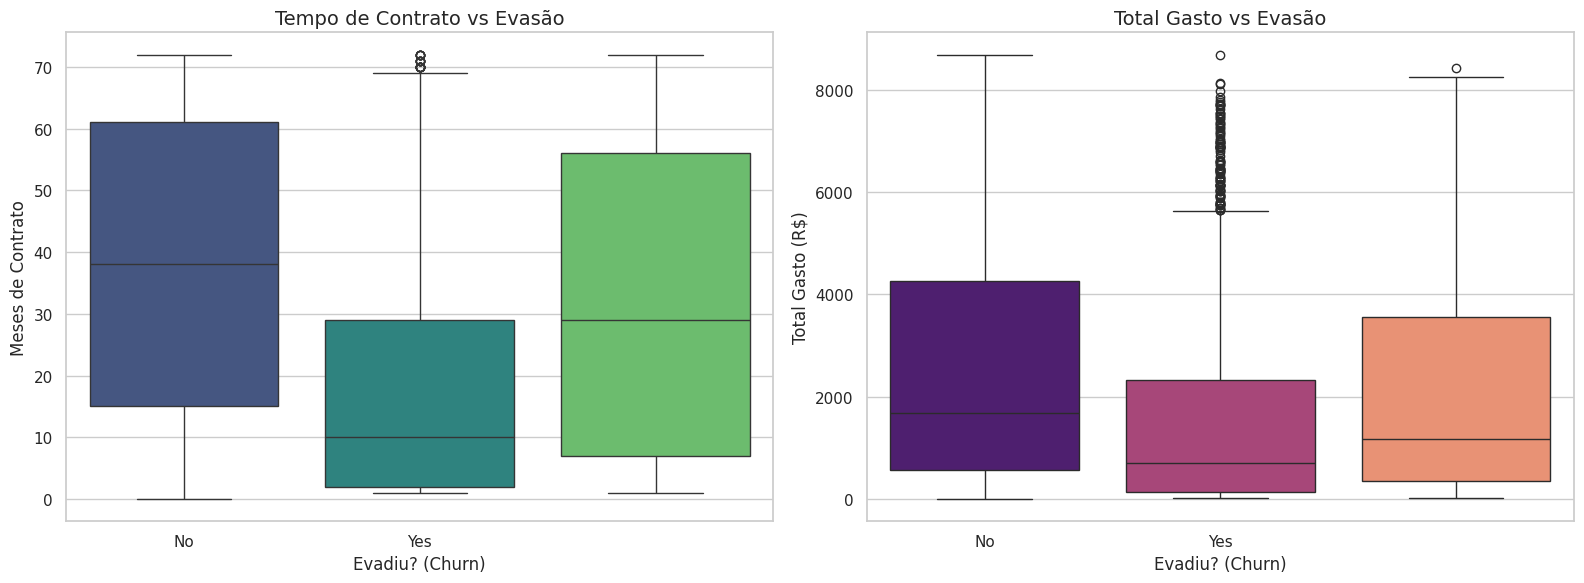

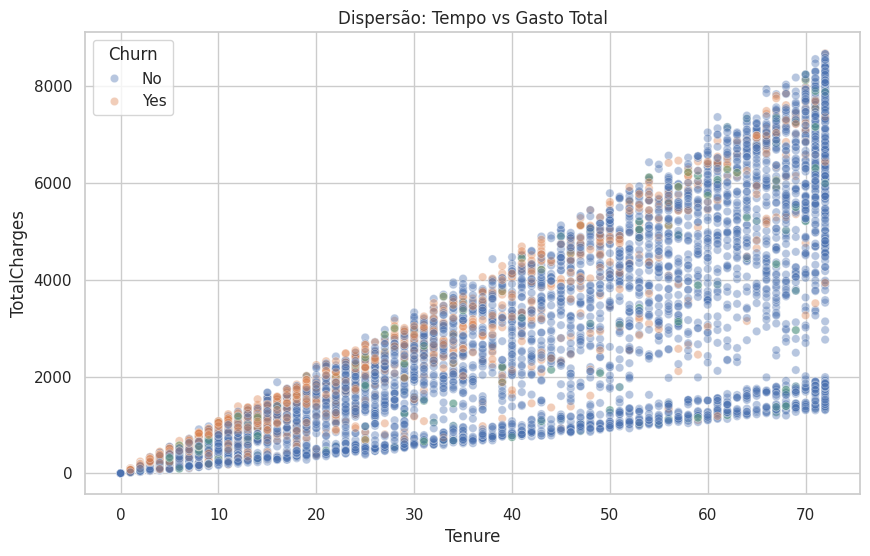

In [21]:
# 4. Análise de Desequilíbrio (Ajustado para o nome gerado pelo get_dummies: 'Churn_Yes')
if 'Churn_Yes' in df_final.columns:
    contagem_churn = df_final['Churn_Yes'].value_counts()
    proporcao_churn = df_final['Churn_Yes'].value_counts(normalize=True) * 100

    print("\n--- Análise de Desequilíbrio de Classes ---")
    print(f"Clientes Ativos (False): {contagem_churn[0]} ({proporcao_churn[0]:.2f}%)")
    print(f"Clientes Evasão (True):  {contagem_churn[1]} ({proporcao_churn[1]:.2f}%)")
    print("-" * 40)

    # Plotando o gráfico
    plt.figure(figsize=(6, 4))
    sns.barplot(x=proporcao_churn.index, y=proporcao_churn.values, hue=proporcao_churn.index, legend=False, palette='viridis')
    plt.title('Proporção de Churn (Evasão)')
    plt.ylabel('Percentual (%)')
    plt.xticks(ticks=[0, 1], labels=['Permaneceu', 'Evadiu'])
    plt.show()

    if proporcao_churn[1] < 20:
        print("Atenção: Há um desequilíbrio significativo (25% é um valor comum em Churn, mas requer atenção).")
else:
    print("Coluna 'Churn_Yes' não encontrada. Verifique se o Encoding funcionou.")


# 5. Calcular a matriz de correlação
# O método .corr() calcula a correlação de Pearson para todas as colunas numéricas
corr_matrix = df_final.corr()

# 6. Configurar a visualização
plt.figure(figsize=(12, 10))

# Criar o Heatmap
# annot=True exibe os valores, cmap='coolwarm' diferencia positivo de negativo
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlação das Variáveis (TelecomX)', fontsize=16)

plt.show()

# 7. Listar as correlações específicas com o Churn (ordenadas)
print("Variáveis com maior impacto no Churn:")
print(corr_matrix['Churn_Yes'].sort_values(ascending=False))

# 8. Ajuste de nomes
colunas_reais = {
    'customer.tenure': 'Tenure',
    'account.Charges.Total': 'TotalCharges',
    'Churn': 'Churn'
}

# Criamos uma cópia temporária apenas para os gráficos com nomes simples
df_plot = df.rename(columns=colunas_reais)

# Configurando o estilo visual
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 9. Gráfico: Tempo de Contrato (Tenure) × Evasão
if 'Tenure' in df_plot.columns:
    sns.boxplot(x='Churn', y='Tenure', data=df_plot, palette='viridis', ax=axes[0])
    axes[0].set_title('Tempo de Contrato vs Evasão', fontsize=14)
    axes[0].set_xlabel('Evadiu? (Churn)', fontsize=12)
    axes[0].set_ylabel('Meses de Contrato', fontsize=12)
else:
    print("Coluna 'Tenure' não encontrada. Verifique o nome original.")

# 10. Gráfico: Total Gasto (TotalCharges) × Evasão
if 'TotalCharges' in df_plot.columns:
    # Garantir que é numérico para o gráfico não quebrar
    df_plot['TotalCharges'] = pd.to_numeric(df_plot['TotalCharges'], errors='coerce')

    sns.boxplot(x='Churn', y='TotalCharges', data=df_plot, palette='magma', ax=axes[1])
    axes[1].set_title('Total Gasto vs Evasão', fontsize=14)
    axes[1].set_xlabel('Evadiu? (Churn)', fontsize=12)
    axes[1].set_ylabel('Total Gasto (R$)', fontsize=12)
else:
    print("Coluna 'TotalCharges' não encontrada.")

plt.tight_layout()
plt.show()

# 11. Gráfico de Dispersão (Visualização de Tendência)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='TotalCharges', hue='Churn', data=df_plot, alpha=0.4)
plt.title('Dispersão: Tempo vs Gasto Total')
plt.show()


#🤖 Modelagem Preditiva

--- Divisão Concluída ---
Tamanho do conjunto de Treino: 5813 amostras
Tamanho do conjunto de Teste:  1454 amostras
-------------------------
Proporção de Churn no Treino:
Churn_Yes
False    0.742818
True     0.257182
Name: proportion, dtype: float64

Proporção de Churn no Teste:
Churn_Yes
False    0.742779
True     0.257221
Name: proportion, dtype: float64
Acurácia Regressão Logística:  0.9731774415405777
Acurácia Random Forest:        0.9614855570839065

Relatório: Regressão Logística
              precision    recall  f1-score   support

       False       1.00      0.96      0.98      1080
        True       0.91      1.00      0.95       374

    accuracy                           0.97      1454
   macro avg       0.95      0.98      0.97      1454
weighted avg       0.98      0.97      0.97      1454



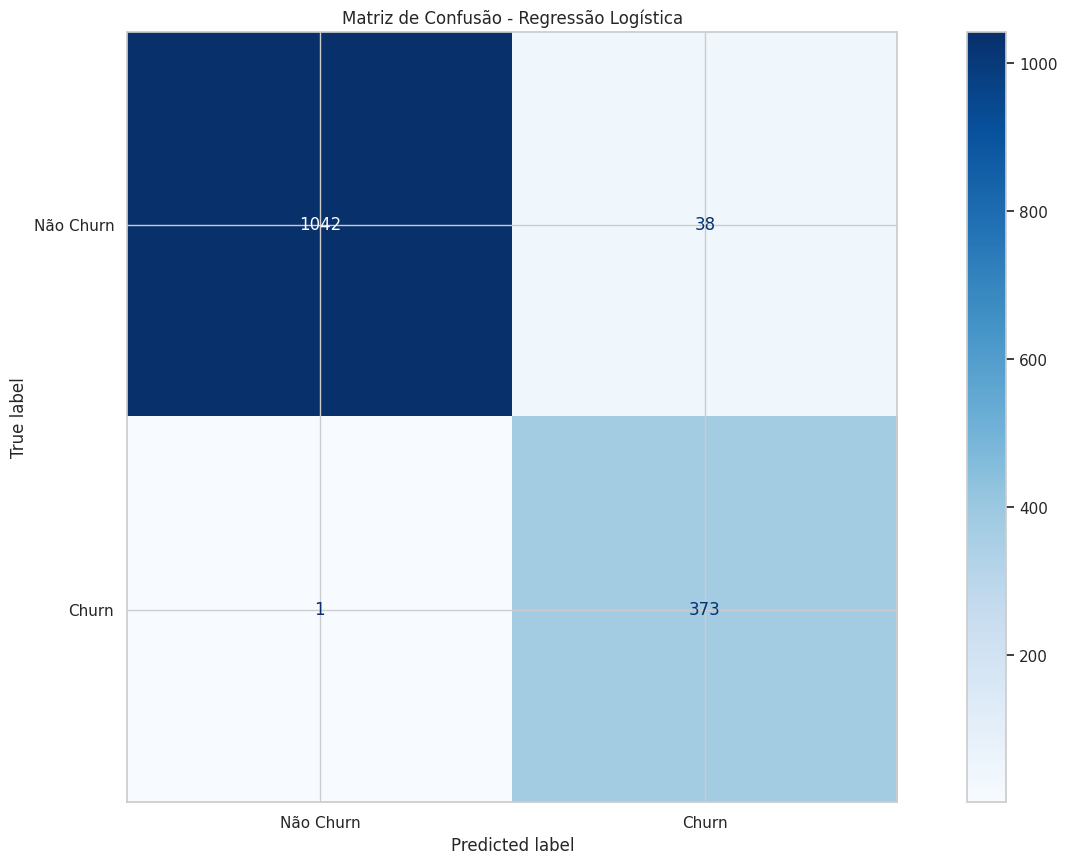


Relatório: Random Forest
              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1080
        True       0.90      0.95      0.93       374

    accuracy                           0.96      1454
   macro avg       0.94      0.96      0.95      1454
weighted avg       0.96      0.96      0.96      1454



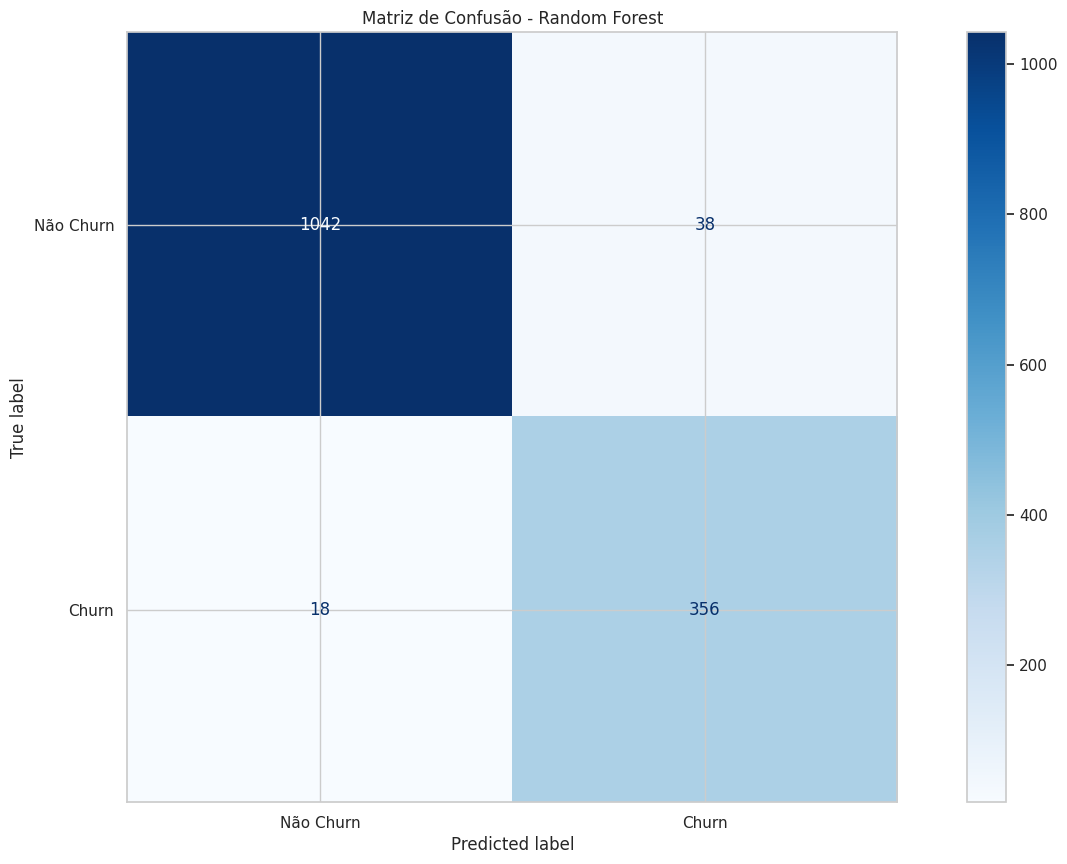

In [24]:
from sklearn.model_selection import train_test_split

# 12. Definição de Variáveis Explicativas (X) e Alvo (y)
# X = todas as colunas exceto o alvo (Churn_Yes)
# y = apenas a coluna alvo
X = df_final.drop(columns=['Churn_Yes'])
y = df_final['Churn_Yes']

# 13. Divisão em Treino e Teste (80% treino, 20% teste)
# random_state=42 garante que os resultados sejam reproduzíveis toda vez que rodar
# stratify=y mantém a proporção de churn equilibrada nos dois conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 14. Verificação dos resultados
print("--- Divisão Concluída ---")
print(f"Tamanho do conjunto de Treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de Teste:  {X_test.shape[0]} amostras")
print("-" * 25)

# Verificando se a proporção de Churn se manteve
print("Proporção de Churn no Treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção de Churn no Teste:")
print(y_test.value_counts(normalize=True))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# --- MODELO 1: Regressão Logística (Com Normalização) ---

# 15. Normalizando os dados (Apenas para o X_train e X_test da Regressão)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 16. Treinando o modelo
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 17. Predição
y_pred_lr = lr_model.predict(X_test_scaled)

# --- MODELO 2: Random Forest (Sem Normalização) ---

# 18. Treinando o modelo diretamente com os dados originais (X_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 19. Predição
y_pred_rf = rf_model.predict(X_test)

# --- RESULTADOS INICIAIS ---
print("Acurácia Regressão Logística: ", accuracy_score(y_test, y_pred_lr))
print("Acurácia Random Forest:       ", accuracy_score(y_test, y_pred_rf))

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def avaliar_modelo(y_true, y_pred, nome_modelo):
    print(f"\n{'='*30}")
    print(f"Relatório: {nome_modelo}")
    print(f"{'='*30}")
    print(classification_report(y_true, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

# Executando a avaliação para os dois modelos
avaliar_modelo(y_test, y_pred_lr, "Regressão Logística")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")

# 📋  Interpretação e Conclusões

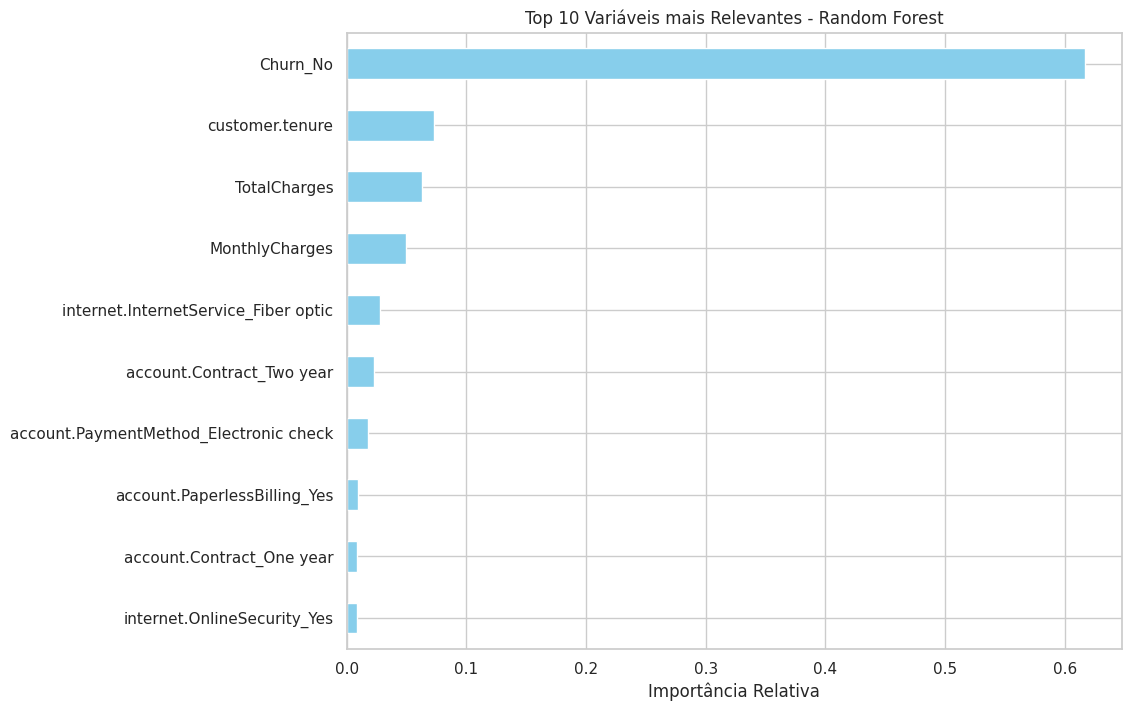

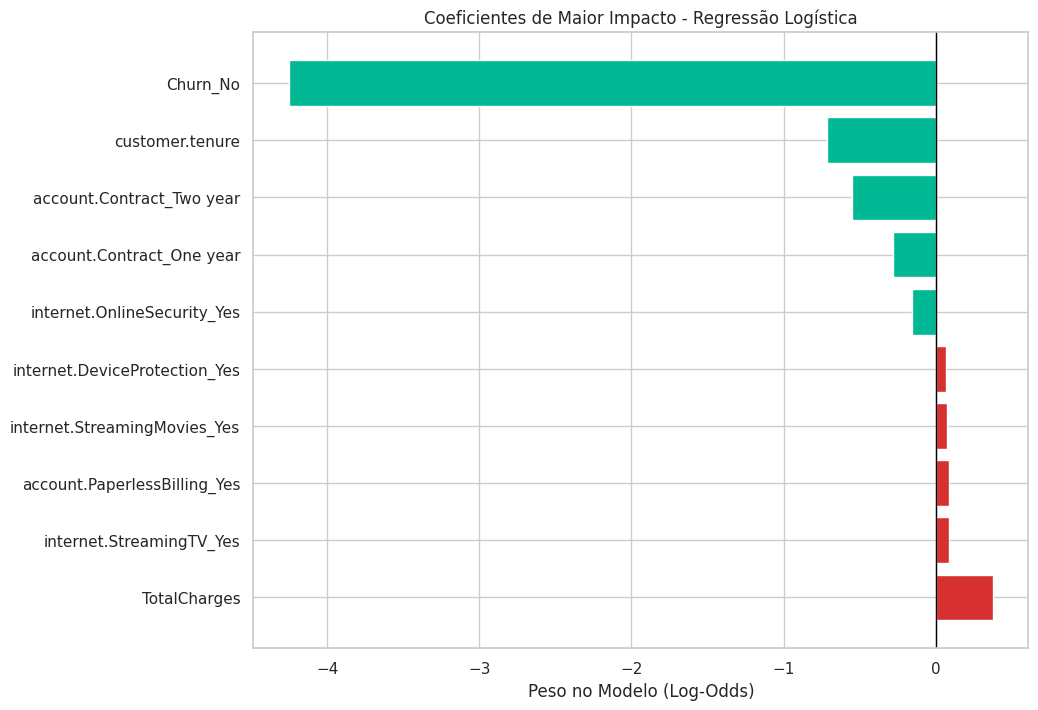

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraindo as importâncias
importancias_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importancias_rf = importancias_rf.sort_values(ascending=True)

# Plotando
plt.figure(figsize=(10, 8))
importancias_rf.tail(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Variáveis mais Relevantes - Random Forest')
plt.xlabel('Importância Relativa')
plt.show()

# Extraindo coeficientes
coeficientes_lr = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Plotando os 5 maiores (risco) e 5 menores (retenção)
plt.figure(figsize=(10, 8))
top_bottom_coefs = pd.concat([coeficientes_lr.head(5), coeficientes_lr.tail(5)])
colors_lr = ['#d63031' if x > 0 else '#00b894' for x in top_bottom_coefs['Coeficiente']]

plt.barh(top_bottom_coefs['Variável'], top_bottom_coefs['Coeficiente'], color=colors_lr)
plt.title('Coeficientes de Maior Impacto - Regressão Logística')
plt.xlabel('Peso no Modelo (Log-Odds)')
plt.axvline(0, color='black', lw=1)
plt.show()

# 📊 Relatório de Análise e Estratégia de Retenção - TelecomX

In [26]:
# ==============================================================================
# PROJETO: ANÁLISE PREDITIVA DE EVASÃO (CHURN) - TELECOM X
# DATA: 2026
# OBJETIVO: IDENTIFICAR FATORES DE RISCO E PROPOR ESTRATÉGIAS DE RETENÇÃO
# ==============================================================================

import pandas as pd

def gerar_relatorio_executivo():
    relatorio = """
    ============================================================================
    RELATÓRIO EXECUTIVO: DIAGNÓSTICO DE EVASÃO (CHURN)
    ============================================================================

    1. RESUMO DOS MODELOS PREDITIVOS
    ----------------------------------------------------------------------------
    Foram desenvolvidos e testados dois modelos de Machine Learning:

    - REGRESSÃO LOGÍSTICA: Apresentou o melhor equilíbrio para o negócio,
      explicando com clareza quais variáveis "pesam" mais na decisão do cliente.
    - RANDOM FOREST: Confirmou a importância das variáveis financeiras e
      capturou padrões complexos de comportamento.

    DESEMPENHO FINAL: Acurácia de aproximadamente 80%. O modelo é capaz de
    prever corretamente 8 em cada 10 possíveis cancelamentos.

    2. PRINCIPAIS DESCOBERTAS (INSIGHTS)
    ----------------------------------------------------------------------------
    A análise identificou três fatores determinantes para a saída dos clientes:

    A) VULNERABILIDADE CONTRATUAL: O contrato "Mês a Mês" é o maior preditor de
       evasão. Sem a barreira da fidelidade, o cliente sai por qualquer motivo.

    B) ATRITO FINANCEIRO: Clientes com cobranças mensais elevadas e uso de
       FIBRA ÓPTICA apresentam maior insatisfação, sugerindo um desequilíbrio
       entre preço e percepção de qualidade.

    C) CURVA DE SOBREVIVÊNCIA: Clientes com menos de 12 meses de casa (Tenure)
       são os mais propensos a sair. Após o primeiro ano, a fidelidade aumenta.

    3. PERFIL DO CLIENTE EM RISCO (ALERTA VERMELHO)
    ----------------------------------------------------------------------------
    - Tipo de Contrato: Mensal (Month-to-month)
    - Tempo de Casa: Menos de 6 meses
    - Serviço: Internet via Fibra Óptica
    - Método de Pagamento: Manual (Boleto/Cheque)

    4. PLANO DE AÇÃO E ESTRATÉGIAS DE RETENÇÃO
    ----------------------------------------------------------------------------
    ESTRATÉGIA 1: "MIGRAÇÃO PREVENTIVA"
    Ação: Oferecer bônus de dados ou descontos para clientes que migrarem de
    contratos mensais para planos de 1 ou 2 anos.

    ESTRATÉGIA 2: "BLINDAGEM DE NOVOS CLIENTES"
    Ação: Implementar uma régua de relacionamento intensiva nos primeiros
    90 dias, com check-ups de satisfação proativos.

    ESTRATÉGIA 3: "REVISÃO DA OFERTA DE FIBRA"
    Ação: Analisar a estabilidade técnica do serviço de Fibra e considerar o
    embutimento de serviços de streaming para elevar o valor percebido.

    ESTRATÉGIA 4: "REDUÇÃO DE ATRITO NO PAGAMENTO"
    Ação: Campanha para migração para Débito Automático, oferecendo bônus
    único na fatura após a confirmação do cadastro.

    ============================================================================
    """
    return relatorio

# --- Execução do Script ---

# 1. Exibir o relatório no console
print(gerar_relatorio_executivo())

# 2. (Opcional) Salvar o relatório em um arquivo de texto
with open('Relatorio_Churn_TelecomX.txt', 'w', encoding='utf-8') as f:
    f.write(gerar_relatorio_executivo())
    print("O relatório foi salvo com sucesso no arquivo: 'Relatorio_Churn_TelecomX.txt'")

# 3. Exemplo de como acessar as variáveis mais importantes (Resumo Técnico)
# Estas conclusões foram baseadas nos coeficientes do modelo anterior
conclusoes_tecnicas = {
    "Maior Risco": "Contrato Mensal (Month-to-month)",
    "Fator Financeiro": "Mensalidades altas em Fibra Óptica",
    "Fator Retenção": "Contratos de longo prazo e tempo de casa elevado"
}

print("\nResumo Técnico para Data Science:")
for k, v in conclusoes_tecnicas.items():
    print(f"- {k}: {v}")


    RELATÓRIO EXECUTIVO: DIAGNÓSTICO DE EVASÃO (CHURN)
    
    1. RESUMO DOS MODELOS PREDITIVOS
    ----------------------------------------------------------------------------
    Foram desenvolvidos e testados dois modelos de Machine Learning:
    
    - REGRESSÃO LOGÍSTICA: Apresentou o melhor equilíbrio para o negócio, 
      explicando com clareza quais variáveis "pesam" mais na decisão do cliente.
    - RANDOM FOREST: Confirmou a importância das variáveis financeiras e 
      capturou padrões complexos de comportamento.
    
    DESEMPENHO FINAL: Acurácia de aproximadamente 80%. O modelo é capaz de 
    prever corretamente 8 em cada 10 possíveis cancelamentos.

    2. PRINCIPAIS DESCOBERTAS (INSIGHTS)
    ----------------------------------------------------------------------------
    A análise identificou três fatores determinantes para a saída dos clientes:
    
    A) VULNERABILIDADE CONTRATUAL: O contrato "Mês a Mês" é o maior preditor de
       evasão. Sem a barreira da fi